# Figures and Tables of Boursiac et al. 2022

- The perpose of this notebook is to reproduce most of the figures and tables of the paper: Yann Boursiac, Christophe Pradal, Fabrice Bauget, Mikaël Lucas, Stathis Delivorias, Christophe Godin, Christophe Maurel, Phenotyping and modeling of root hydraulic architecture reveal critical determinants of axial water transport, Plant Physiology, 2022;, kiac281, https://doi.org/10.1093/plphys/kiac281
- The main parameters are pass to the python scripts via a yaml file by command line
- the scripts may have some command line arguments, for example: to give the name of an ouput file when it may have one, to specify if parameters adjustment must be performed, etc. 
- due to very long run time, especially for the adjustment on cut and flow experiments, some figures are simply from csv files of results
- however an example, figure 2-B, is given with a reasonable run time of about 20 minutes, other adjustment may then be tried by changing the architecture file name in the yaml file
- still to get reasonable run time some shortest sets of data have been used (e.i. for Figure 5 and supplemental figure 6), but the full set may be used by uncommenting a line in the python script)
**Remark:** this the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architectures with a given seed than the architectures in Boursiac2022. That may explain slightly different results .

In [1]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['../src', '../test', '../example'])
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:50:36) [MSC v.1929 64 bit (AMD64)] on win32


### Figure 1-B:
- see end of simulation_fig-1B-3C-6E-7B.py to adjust picture size, and visual radius of the root

In [2]:
%run simulation_fig-1B-3C-6E-7B.py parameters_fig-1B.yml --prop order

ImportError: cannot import name 'mtg_scene' from 'hydroroot.display' (C:\Users\FB\miniconda3\envs\hydroroot3\lib\site-packages\OpenAlea.HydroRoot-1.0.1-py3.9.egg\hydroroot\display.py)

### Figure 2-A

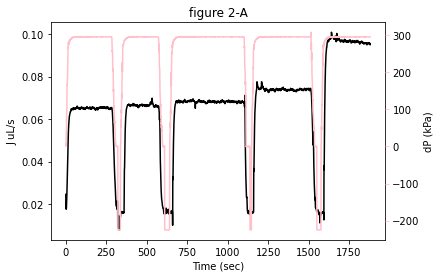

In [3]:
draw = pd.read_csv("data_figures/fig_2-A.csv", sep = ';')
fig = {}
ax5 = {}
ax6 = {}

fig = plt.figure()
ax5 = fig.add_subplot(111, label = "1")
draw.plot.line('Time (sec)', 'FLOW (?L.s-1)', color = 'black', ax = ax5)
ax5.set_title('figure 2-A')
ax5.set_ylabel('J uL/s')
ax6 = fig.add_subplot(111, label = "2", frame_on = False)
ax5.get_legend().remove()
draw.plot.line('Time (sec)', 'Pressure (kPa)', ax = ax6, color = 'pink')
ax6.yaxis.tick_right()
ax6.yaxis.set_label_position('right')
ax6.set_ylabel('dP (kPa)')
ax6.get_xaxis().set_visible(False)
ax6.tick_params(axis = 'y', color = "pink")
ax6.get_legend().remove()

### Figure 2-B: 
- run the adjustment of K and k see file parameters_fig-2-B.yml for the initial guesses of these parameters
- run time is around 20 minutes

Simulation runs:  1
#############################
finished minimize ax, ar       fun: 4.8828008046912096e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 9.02094015e-06, -6.94380674e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([0.61020848, 5.7837016 ])
*******************************************************************************


/home/fabrice/miniconda2/envs/hydroroot3/lib/python3.8/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


finished minimize Kx      fun: 6.945937548233918e-10
     jac: array([-5.90800684e-05, -1.71418864e-04, -2.71816317e-04, -7.61970134e-04,
       -9.92031455e-04, -2.77793934e-04, -1.11403983e-04, -8.61957204e-04,
       -2.27564250e-04])
 message: 'Optimization terminated successfully'
    nfev: 253
     nit: 24
    njev: 24
  status: 0
 success: True
       x: array([0.00047371, 0.00019327, 0.00052036, 0.0003354 , 0.00046673,
       0.0024571 , 0.00343671, 0.00274265, 0.00127265])
Simu,  601.5049667084518 1.3327101531260848e-10 601.9238958820997 dk0 =  0.17550165253334504 dKx =  3.5815476958462954e-06
finished minimize Kx      fun: 1.0235507517735802e-10
     jac: array([-3.34248816e-05, -2.14819139e-05,  1.49795231e-05,  2.73097200e-05,
       -2.85809820e-04, -1.19857727e-04, -3.73311087e-05, -1.57034561e-04,
       -4.76678046e-05])
 message: 'Optimization terminated successfully'
    nfev: 14
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.00047375, 0.0001932

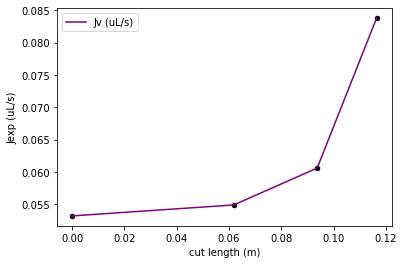

In [4]:
%run adjustement_K_and_k.py parameters_fig-2-B.yml -op

### Figure 2-C
- because of run time that may be hight the whole set of adjustment in this notebook is not propose
- instead the final results is display from a csv file
- however the user may reproduce them by changing the input_file name in parameters_fig-2-B.yml keeping the same initial guesses for k and K. These files are located in the folder data and contain the following string: 160316#2, 2020-01-19-9h06, 15012020-1045, 200219-ybfb-col, 200619-ybfb-col-1, 200619-ybfb-col-2, 200702-ybfb-col-1, 200703-ybfb-col-2, 200703-ybfb-col-3, 200724-ybfb-col-1

Text(0.5, 1.0, 'fig-2-C')

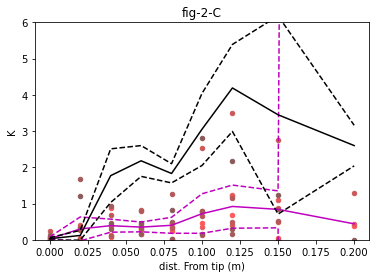

In [5]:
draw = pd.read_csv("data_figures/fig_2-C.csv", sep = ',', dtype = 'float')
ax = draw.plot('x K median', 'mediancurve from cut and flow measurements',color='m')
draw.plot('x K median', 'median -t*SE', color='m', ax=ax, style='--')
draw.plot('x K median', 'median + t*SE', color='m', ax=ax, style='--')
for i in range(0,20,2):
    color = (1.0-float(i)/40.0,0.35,0.35)
    draw.plot.scatter(i,i+1, ax = ax, color = color, edgecolor = color)
ax.set_ylim(0.0, 6.0)
draw.plot('dist. From tip (m)', 'K lowess from Poiseuille\'s law on xylem', color='k', ax=ax)
draw.plot('dist. From tip (m)', 'Unnamed: 31', color='k', ax=ax, style='--')
draw.plot('dist. From tip (m)', 'Unnamed: 32', color='k', ax=ax, style='--')
ax.get_legend().remove()
ax.set_ylabel('K')
ax.set_title('fig-2-C')

### Figure 2-D
- as written in the article draft:
    - Poiseuille value are k obtain on full plants (plant-1 to plant-10) see below Table to run adjustment over the plant set and the resulting k set
    - Cut and flow are the k obtained from the previous adjustment

Text(0.5, 1.0, 'fig-2-D')

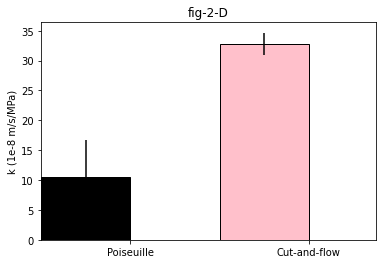

In [6]:
barwidth = 0.4
cut_n_flow = [9.86, 47.68, 71.43, 21.97, 60.15, 34.16, 10.19, 23.42, 26.62, 22.17]
se1 = np.std(cut_n_flow)/np.sqrt(len(cut_n_flow))
poiseuille = [3.39, 7.08, 8.7, 5.59, 13.12, 8.3, 19.22, 22.13, 12.76, 4.03]
se2 = np.std(poiseuille)/np.sqrt(len(poiseuille))
plt.bar(0.2, np.mean(poiseuille), width = barwidth, color = 'black', edgecolor = 'black', yerr=se1, label = 'poiseuille')
plt.bar(1.0, np.mean(cut_n_flow), width = barwidth, color = 'pink', edgecolor = 'black', yerr=se2, label = 'cut_n_flow')
plt.xlim(0,1.5)
plt.xticks([0.4, 1.2], ['Poiseuille', 'Cut-and-flow'])
plt.ylabel('k (1e-8 m/s/MPa)')
plt.title('fig-2-D')

### Table 1:
- related to fig-2-D
- simulations duration: couple of minutes

In [7]:
%run simulation_table-1.py parameters_table-1.yml

Simulation runs:  10
#############################
plant-10.txt          plant  total length (m)  surface (m2)  k (10-8 m/s/MPa)
0   plant-1.txt            1.6260      0.000463          3.393467
1   plant-2.txt            1.8761      0.000518          7.081622
2   plant-3.txt            1.5992      0.000448          8.699297
3   plant-4.txt            0.7099      0.000220          5.586774
4   plant-5.txt            1.8824      0.000510         13.124087
5   plant-6.txt            1.1174      0.000336          8.298469
6   plant-7.txt            2.1262      0.000603         19.224790
7   plant-8.txt            2.1082      0.000605         22.132164
8   plant-9.txt            1.1336      0.000360         12.764829
9  plant-10.txt            0.7824      0.000259          6.305533


### Figure 3-A and 3-B

Text(0.5, 1.0, 'fig-3-B')

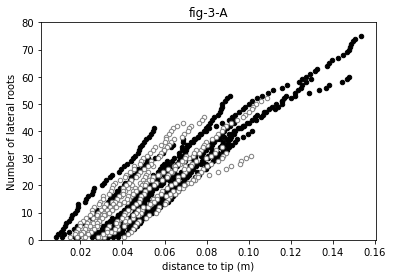

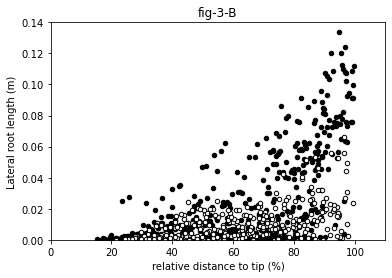

In [8]:
df3a = pd.read_csv("data_figures/fig-3-A.csv", sep = ',', dtype = 'float')
df3a.iloc[:,range(0,43,2)]=df3a.iloc[:,range(0,43,2)]/1000
ax = df3a.plot.scatter(0,1,marker='o',color='black',edgecolor ='black')
for i in range(2,26,2):
    df3a.plot.scatter(i,i+1,marker='o',color='black',edgecolor ='black',ax=ax)
for i in range(26,43,2):
    df3a.plot.scatter(i,i+1,marker='o',color='white',edgecolor ='grey',ax=ax)
# ax.set_xlim(0,0.16)
ax.set_ylim(0,80)
ax.set_ylabel('Number of lateral roots')
ax.set_xlabel('distance to tip (m)')
ax.set_title('fig-3-A')
df3b = pd.read_csv("data_figures/fig-3-B.csv", sep = ',', dtype = 'float')
df3b.iloc[:,[0,2]]=df3b.iloc[:,[0,2]]/1000
ax = df3b.plot.scatter(1,0,marker='o',color='black',edgecolor ='black')
df3b.plot.scatter(3,2,marker='o',color='white',edgecolor ='black',ax=ax)
ax.set_xlim(0,110)
ax.set_ylim(0,0.14)
ax.set_ylabel('Lateral root length (m)')
ax.set_xlabel('relative distance to tip (%)')
ax.set_title('fig-3-B')

### Figure 3-C
- generate 3 architecture according to the seeds, the primary length, etc., given in simulation_fig
- see end of the script simulation_fig-1B-3C-6E-7B.py to adjust picture size, and visual radius of the root
**Remark:** this the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architecture with a given seed than the architectures in Boursiac2022

10318687 1.0


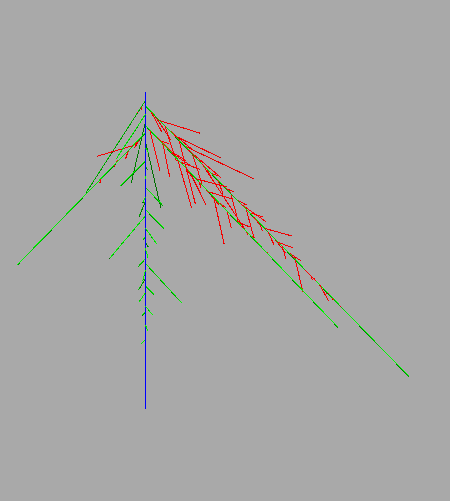

12999162 1.0


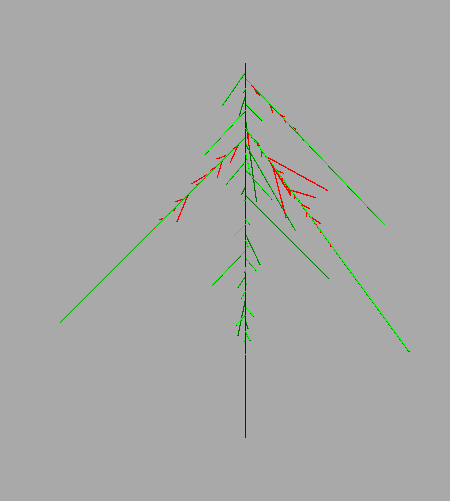

70180638 1.0


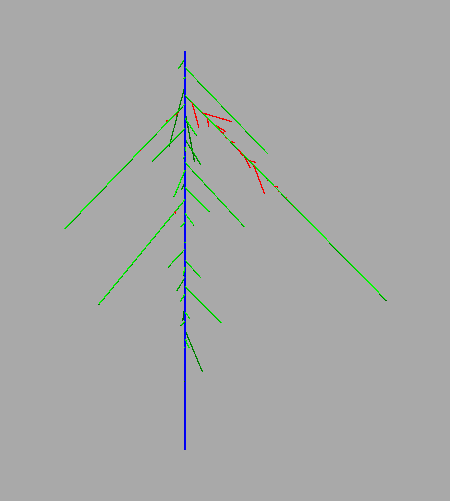

In [9]:
%run simulation_fig-1B-3C-6E-7B.py parameters_fig-3C.yml --prop order

### Figure 4-A

Text(0.5, 1.0, 'fig-4-A')

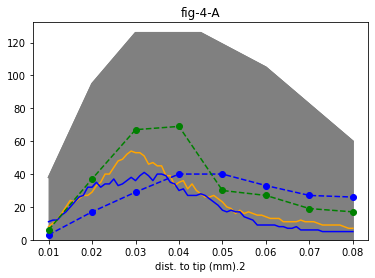

In [10]:
df4a = pd.read_csv("data_figures/fig-4-A.csv", sep = ',', dtype = 'float')
df4a.iloc[:,[0,3,6]]=df4a.iloc[:,[0,3,6]]/1e3
ax=df4a.plot(0,'all intercepts 1',color='orange')
df4a.plot(0,'all intercepts 2',color='blue',ax=ax)
df4a.plot(3,'discrete plant 3',color='blue',style='--',marker='o',ax=ax)
df4a.plot(3,'discrete plant 4',color='green',style='--',marker='o',ax=ax)
df4a.plot(6,'max sim',color='grey',ax=ax)
df4a.plot.area(6,'max sim',ax=ax,color='grey')
ax.legend().remove()
ax.set_title('fig-4-A')

### Figure 4-B

Text(0.5, 1.0, 'fig-4-B')

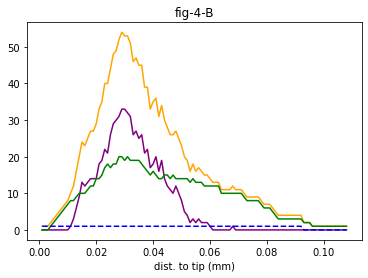

In [11]:
df4b = pd.read_csv("data_figures/fig-4-B.csv", sep = ',')
df4b.iloc[:,[0]]/=1e3
ax=df4b.plot(0,'all intercepts',color='orange')
df4b.plot(0,'intercepts order 2',color='purple',ax=ax)
df4b.plot(0,'intercepts order 1',color='green',ax=ax)
df4b.plot(0,'intercepts order 0',color='blue',style='--',ax=ax)
ax.legend().remove()
ax.set_title('fig-4-B')

### Figure 4-C

Text(0.5, 1.0, 'fig-4-C')

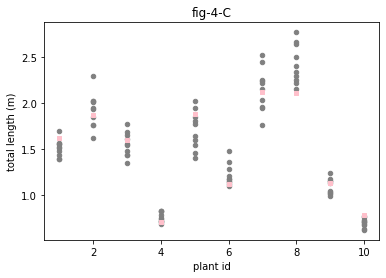

In [12]:
df4c = pd.read_csv("data_figures/fig-4-C.csv", sep = ',')
ax=df4c.plot.scatter('simulated plant id','total length simulated (m)',color='grey')
df4c.plot.scatter('plant id','total length (m)',color='pink',marker='s',edgecolor='pink',ax=ax)
ax.set_title('fig-4-C')

### Figure 5 and supplemental figure 8:
- In the saved notebook the figures correspond to a shortest subset of the generated roots used for the submitted paper for run time purpose
- with this shortest set run time is around 20 minutes against 10 times more for the complete set
- the choice of the generated root set to run may be changed at the beginning of the python script main function
**Remark:** this the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architecture with a given seed the architectures in Boursiac2022. That may explain that results are slightly different.

Simulation runs:  952
#############################
runs done 100.0 %%running time is  1148.770581483841


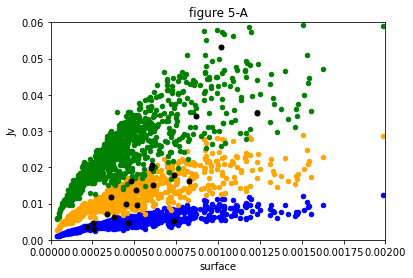

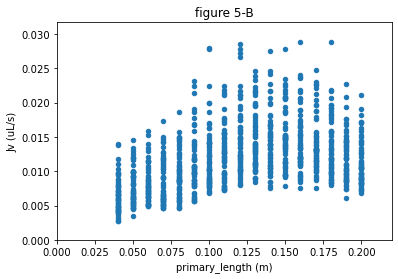

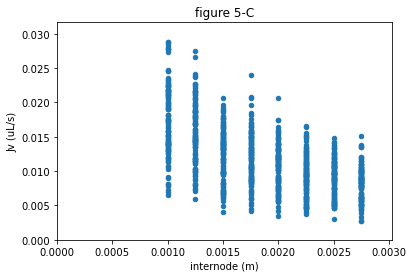

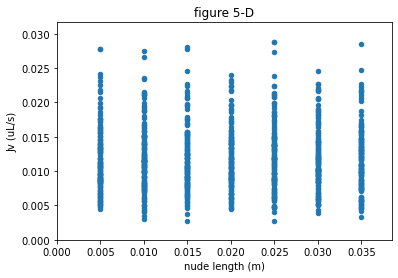

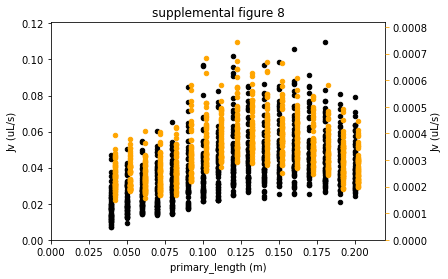

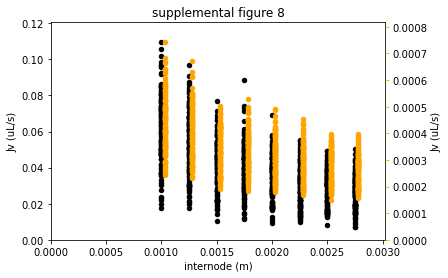

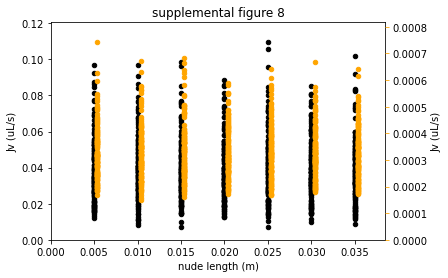

In [13]:
%run simulation_fig-5_sup-fig-8.py parameters_fig-5_sup-fig-8.yml

### Figure 6-A and supplemental figure 4
- run times: few minutes
**Remark:** this the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architecture with a given seed than the architectures in Boursiac2022. That may explain results slightly different

Simulation runs:  256
#############################
100

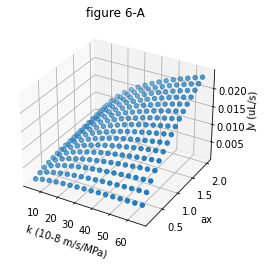

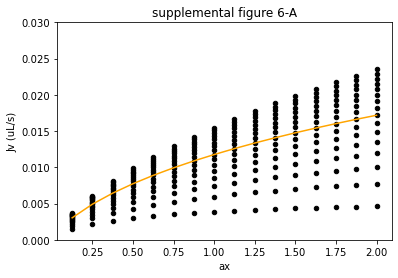

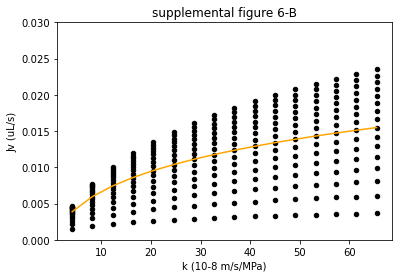

In [14]:
%run simulation_fig-6A_sup-fig-6.py parameters-fig-6A_sup-fig-6.yml

### Figure 6-B and 6-C
- For run time purpose, the results in the saved notebook have been obtained using a shortest subset of generated root with less ax and k values than for the submitted paper
- run time with these parameters: 30 to 50 minutes
- run time with the full set of roots, ax and k: several hours
- the choice of the generated roots set may be changed at the beginning of the python script main function
- the range of ax and k may be changed in parameters-fig-6-B-C.yml. The k value is changed by the intermediary of the factor radfold
**Remark:** this the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architecture with a given seed than the architectures in Boursiac2022. That may explain results slightly different

Simulation runs:  23800
#############################
fig-6-B: runs done 100.0 %%%running time is  1909.7911396026611


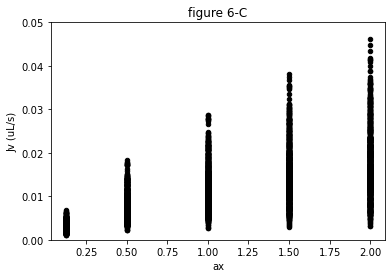

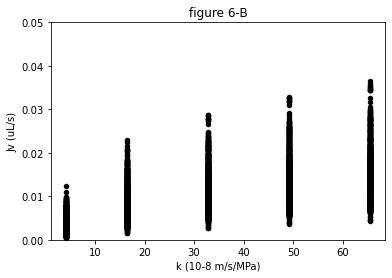

In [12]:
%run simulation_fig-6-B-C.py parameters-fig-6-B-C.yml

### Figure 6-D
- simulations duration: few minutes

Simulation runs:  20
#############################
figure 6-D
00Simulation runs:  20
#############################
figure 6-D
00

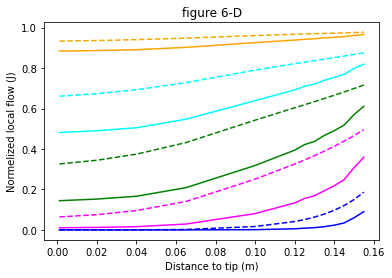

In [15]:
%run simulation_fig-6D.py parameters_fig-6D_sup-fig-7.yml

### Figure 6-E:
- see end of simulation_fig-1B-3C-6E-7B.py to adjust picture size, and visual radius of the root

plant-1.txt 0.125


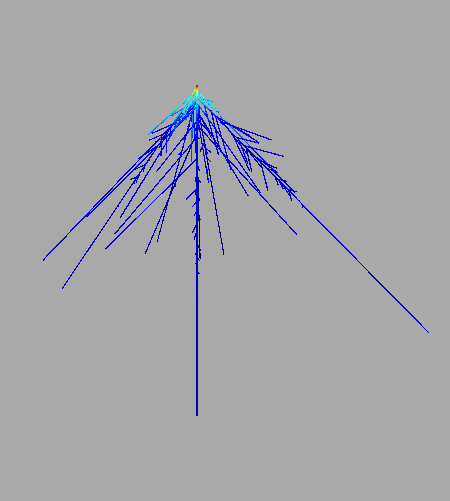

plant-1.txt 1.0


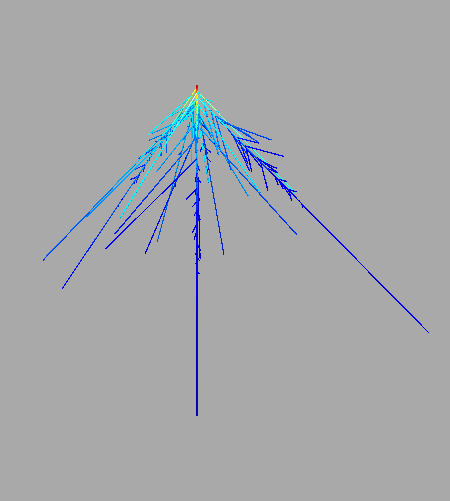

plant-1.txt 2.0


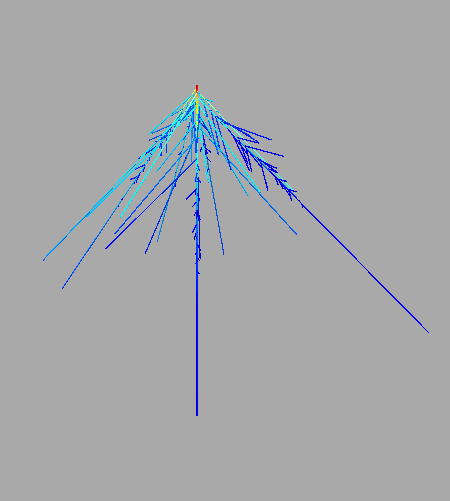

In [17]:
%run simulation_fig-1B-3C-6E-7B.py parameters-fig-6E_sup-fig-4C.yml --prop j

### Figure 7-A

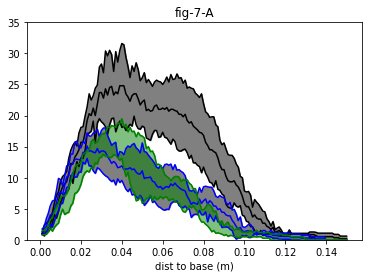

In [18]:
df7a = pd.read_csv("data_figures/fig-7-A.csv", sep = ',')
ax=df7a.plot('dist to base (m)','n Col0',color='black')
df7a.plot('dist to base (m)','95 - Col',color='black',ax=ax)
df7a.plot('dist to base (m)','95 + Col',color='black',ax=ax)
ax.fill_between(list(df7a.loc[:,'dist to base (m)']),list(df7a.loc[:,'95 - Col']),list(df7a.loc[:,'95 + Col']), color='grey')
df7a.plot('dist to base (m)','esk1-5',color='blue',ax=ax)
df7a.plot('dist to base (m)','95 - esk1-5',color='blue',ax=ax)
df7a.plot('dist to base (m)','95 + esk1-5',color='blue',ax=ax)
ax.fill_between(list(df7a.loc[:,'dist to base (m)']),list(df7a.loc[:,'95 - esk1-5']),list(df7a.loc[:,'95 + esk1-5']), color='grey')
df7a.plot('dist to base (m)','95 - esk1-1',color='green',ax=ax)
df7a.plot('dist to base (m)','95 + esk1-1',color='green',ax=ax)
ax.fill_between(list(df7a.loc[:,'dist to base (m)']),list(df7a.loc[:,'95 - esk1-1']),list(df7a.loc[:,'95 + esk1-1']), color='green', alpha=0.5)
ax.set_title('fig-7-A')
ax.set_ylim(0,35.0)
ax.legend().remove()

### Figure 7-B

plant-1.txt 1.0


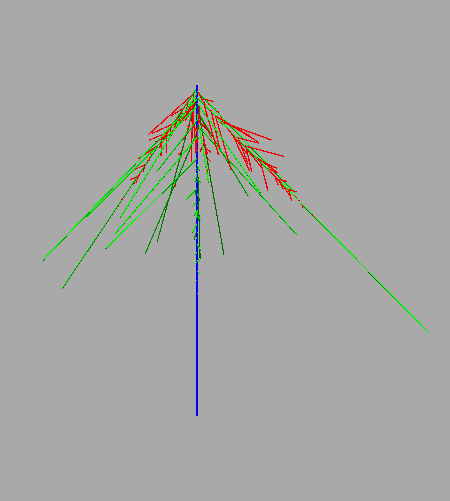

20-07-02-SD-150218-esk11-7.txt 1.0


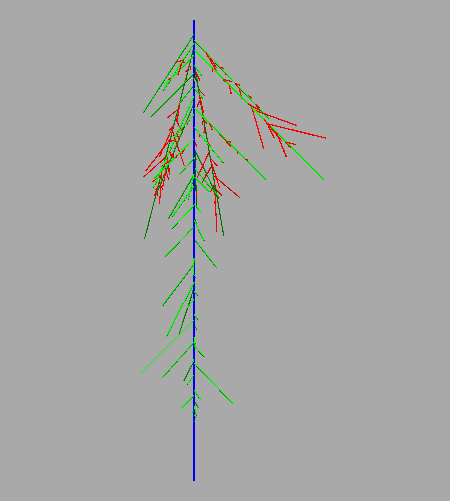

20-06-09-FB-180719-e15ch1-1.txt 1.0


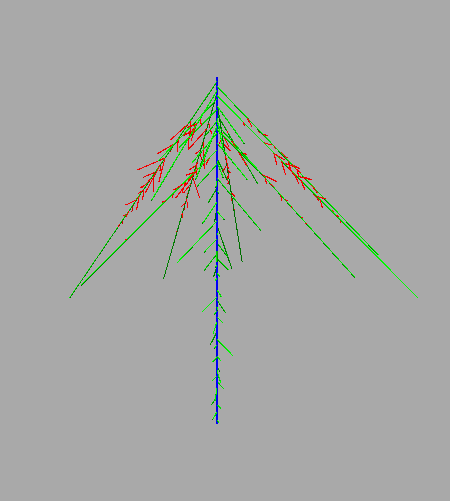

In [19]:
%run simulation_fig-1B-3C-6E-7B.py parameters_fig-7B.yml --prop order

### Figure 7-C:
- because of run time that may be hight the whole set of adjustment in this notebook is not propose
- instead the final results is display from a csv file
- however the user may reproduce them by changing the input_file name in parameters_fig-2-B.yml keeping the same initial guesses for k and K. These files are located in the folder data and contain the following string: 200619-ybfb-e11-2, 200703-ybfb-e11-3, 200721-ybfb-e11-2, 200724-ybfb-e11-2, 200812-ybfb-e11-3, 200619-ybfb-e15-1, 200619-ybfb-e15-2, 200703-ybfb-e15-3, 200721-ybfb-e15-1, 200721-ybfb-e15-2, 200812-ybfb-e15-1, 200812-ybfb-e15-3

Text(0.5, 1.0, 'fig-7-C')

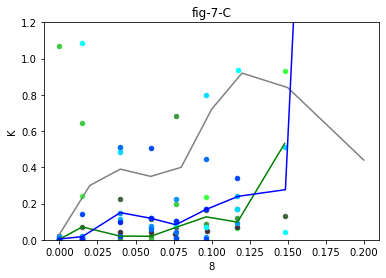

In [20]:
ax = draw.plot('x K median', 'mediancurve from cut and flow measurements',color='grey')
draw2 = pd.read_csv("data_figures/fig_7-C-e11.csv", sep = ',', dtype = float)
draw2.plot('x', 'median-esk1-1',color = 'green',ax=ax)
for i in range(0,10,2):
    color = (0.25,1.0-float(i)/10.0,0.25)
    draw2.plot.scatter(i,i+1, ax = ax, color = color, edgecolor = color)
draw3 = pd.read_csv("data_figures/fig_7-C-e15.csv", sep = ',', dtype = float)
draw3.plot('x', 'median esk1-5',color ='blue',ax=ax)
for i in range(0,14,2):
    color = (0.,1.0-float(i)/14.0,1.)
    draw3.plot.scatter(i,i+1, ax = ax, color = color, edgecolor = color)
ax.get_legend().remove()
ax.set_ylabel('K')
ax.set_ylim(0,1.2)
ax.set_title('fig-7-C')

### Figure 7-D

Text(0.5, 1.0, 'fig-7-D')

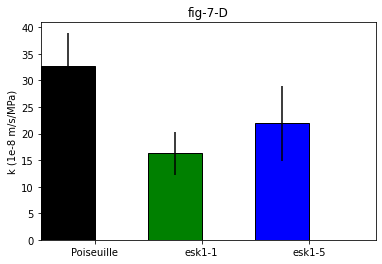

In [21]:
barwidth = 0.4
cut_n_flow = [9.86, 47.68, 71.43, 21.97, 60.15, 34.16, 10.19, 23.42, 26.62, 22.17]
se1 = np.std(cut_n_flow)/np.sqrt(len(cut_n_flow))
esk11 = [10.9, 33.6, 16.6, 10.2, 10]
se3 = np.std(esk11)/np.sqrt(len(esk11))
esk15 = [11.1, 12.7, 39.5, 9.82, 10.1, 9.69, 60.5]
se4 = np.std(esk15)/np.sqrt(len(esk15))
plt.bar(0.2, np.mean(cut_n_flow), width = barwidth, color = 'black', edgecolor = 'black', yerr=se1, label = 'cut_n_flow')
plt.bar(1.0, np.mean(esk11), width = barwidth, color = 'green', edgecolor = 'black', yerr=se3, label = 'esk1-1')
plt.bar(1.8, np.mean(esk15), width = barwidth, color = 'blue', edgecolor = 'black', yerr=se4, label = 'esk1-5')
plt.xlim(0,2.5)
plt.xticks([0.4, 1.2, 2.0], ['Poiseuille', 'esk1-1', 'esk1-5'])
plt.ylabel('k (1e-8 m/s/MPa)')
plt.title('fig-7-D')

### Supplemental Figure 1-B

Text(0.5, 1.0, 'supplemental fig-1 B')

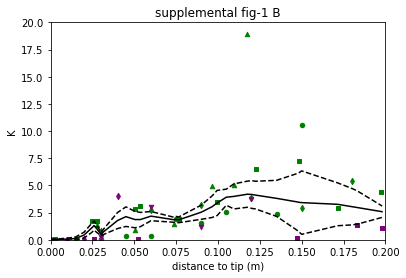

In [22]:
df1c = pd.read_csv("data_figures/sup-fig-1-C.csv", sep = ',', dtype = float)
marker = ['o','s','^','d','s','d','v']
colors = ['green','green','green','green','purple','purple','purple']
ax = df1c.plot('X lowess','K lowess', color='black')
df1c.plot('X lowess', 'SE -',color='black',style='--',ax=ax)
df1c.plot('X lowess', 'SE +',color='black',style='--',ax=ax)
n=0
for i in range(0,21,3):
    df1c.plot.scatter(i,i+1,marker=marker[n],color=colors[n],edgecolor =colors[n],ax=ax)
    n+=1
ax.set_xlim(0,0.2)
ax.set_ylim(0,20)
ax.get_legend().remove()
ax.set_ylabel('K')
ax.set_xlabel('distance to tip (m)')
ax.set_title('supplemental fig-1 B')

### Supplemental Figure 3

Text(0.5, 0, 'Dist. to tip (m)')

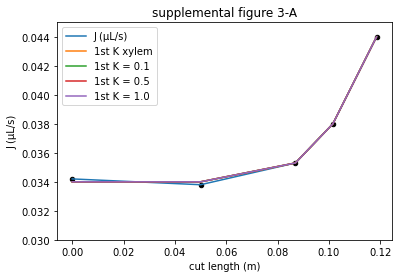

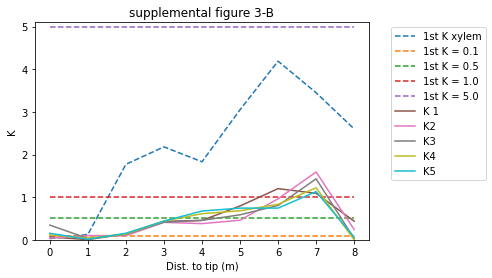

In [23]:
dsf2a = pd.read_csv("data_figures/sup-fig-3-A.csv", sep = ',', dtype = float)
ax = dsf2a.plot.scatter(0,1,color='black')
for i in range(1,6):
    dsf2a.plot(0,i, ax=ax)
ax.set_ylim(0.03,0.045)
ax.set_title('supplemental figure 3-A')
dsf2b = pd.read_csv("data_figures/sup-fig-3-B.csv", sep = ',', dtype = float)
ax2 = dsf2b.iloc[:,range(1,10,2)].plot(style='--')
dsf2b.iloc[:,range(2,11,2)].plot(ax=ax2)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_ylim(0,5.1)
ax2.set_title('supplemental figure 3-B')
ax2.set_ylabel('K')
ax2.set_xlabel('Dist. to tip (m)')

### Supplemental Figure 4 C
the figures are not shown from the same side, to see the representation from the same direction run the script from a console with the last lines about viewer commented, and then rotate by 180.

('plant-1.txt', 0.125)


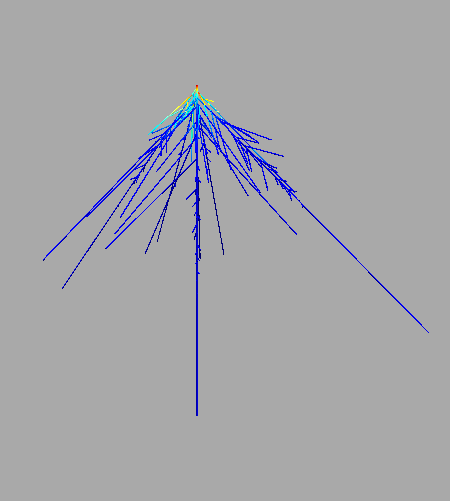

('plant-1.txt', 1.0)


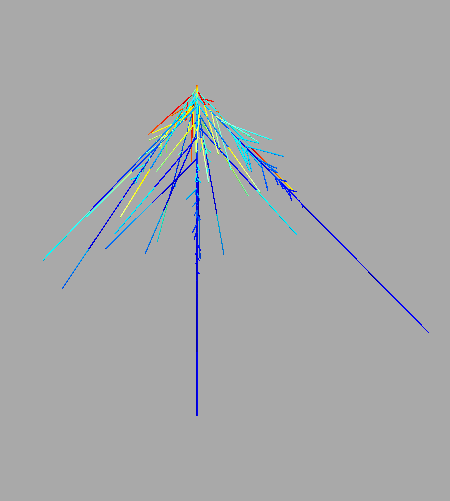

('plant-1.txt', 2.0)


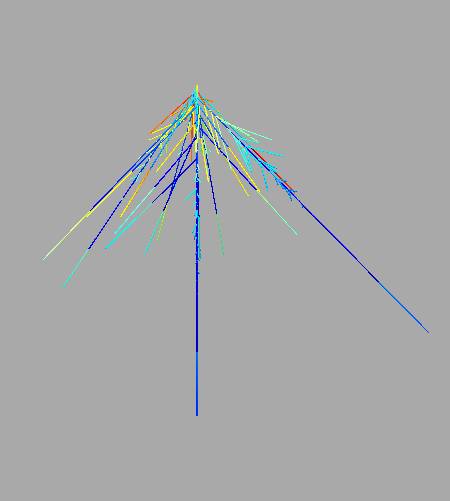

In [25]:
%run simulation_sup-fig-4C.py parameters-fig-6E_sup-fig-4C.yml

### Supplemental Figure 5

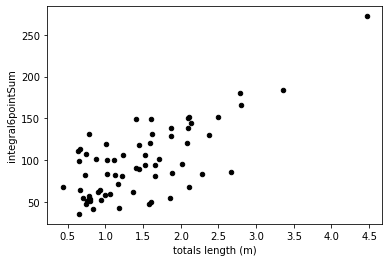

In [26]:
dfs3a = pd.read_csv("data_figures/sup-fig-5-A.csv", sep = ',')
ax=dfs3a.plot.scatter('totals length (m)','integral6pointSum',color='black')

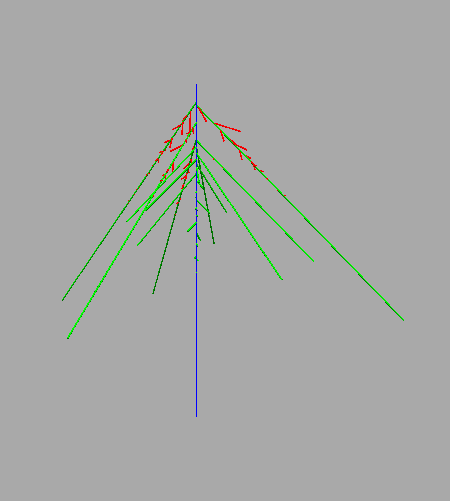

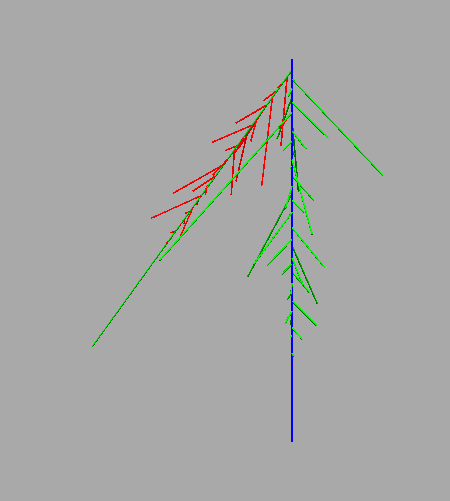

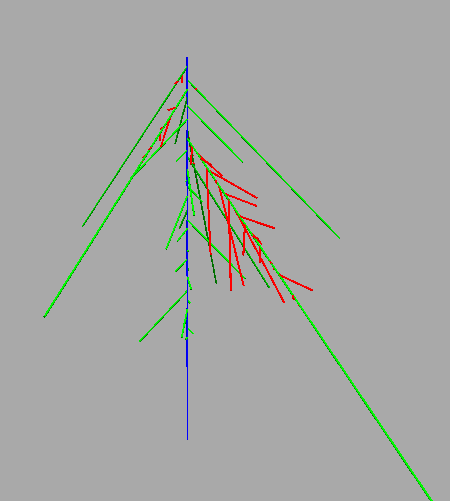

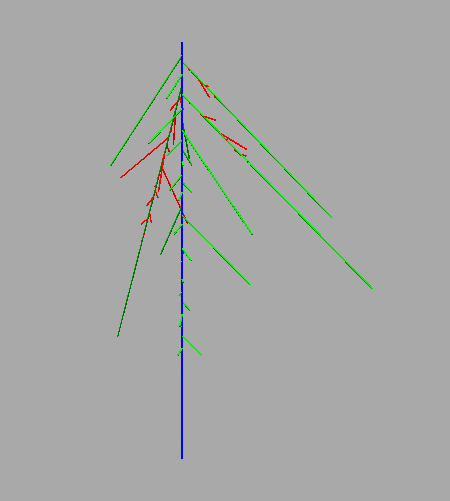

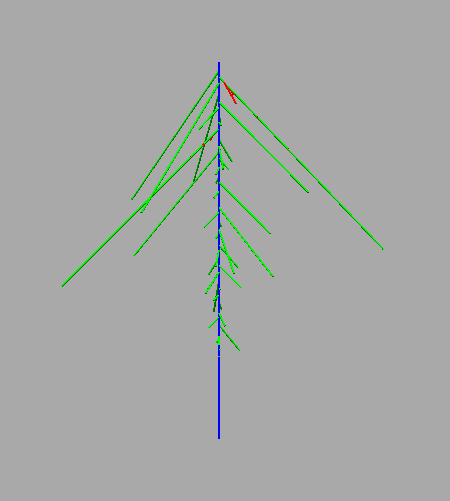

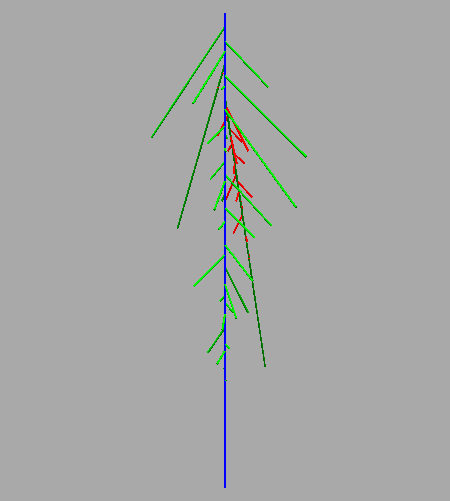

In [27]:
%run simulation_sup_fig-5-B.py parameters-sup-fig-5-B.yml

### supplemental figure 7
- For run time purpose, the results in saved notebook using a shortest subset of generated root with less ax and k values than for the submitted paper
- run time with short_subset_generated-roots-20-10-07_PR_016.csv: 10 minutes
- run time with subset_generated-roots-20-10-07_PR_016.csv: at least one hour
**Remark:** this the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architecture with a given seed than the architectures in Boursiac2022. That may explain results slightly different

Simulation runs:  1120
#############################
55.89 %%% ax =  0.7499999999999998


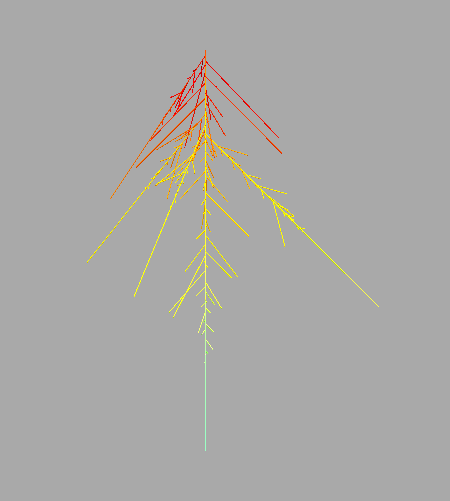

56.34 % ax =  0.49999999999999956


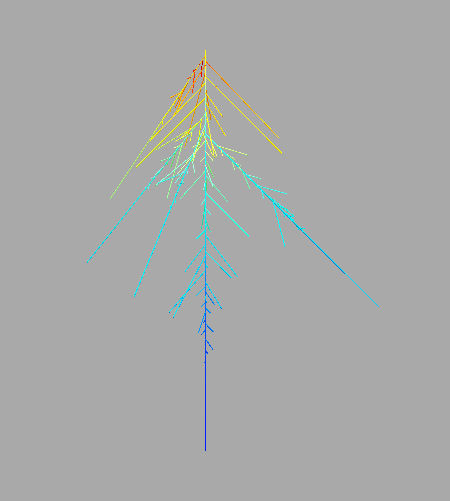

56.79 % ax =  0.24999999999999933


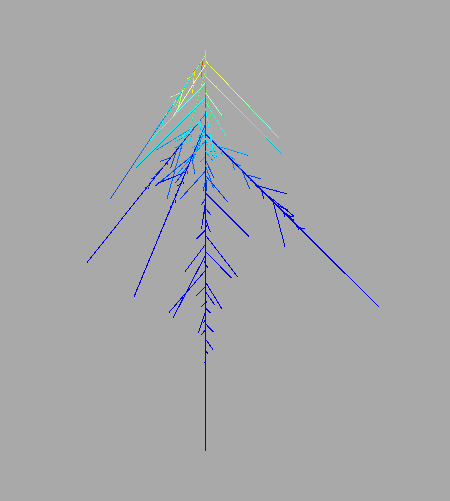

57.14 % ax =  0.049999999999999156


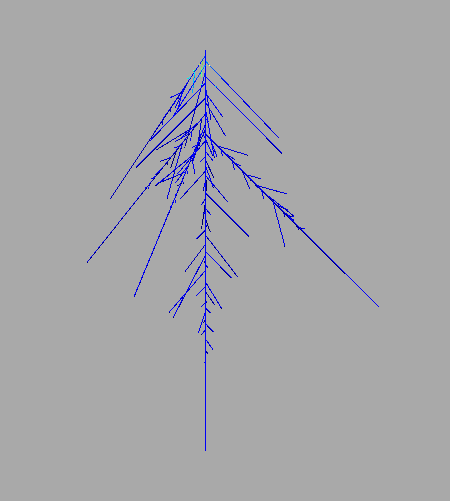

100.0 %running time is  386.24464869499207


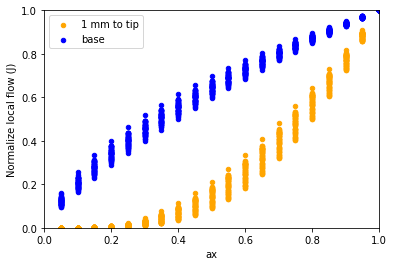

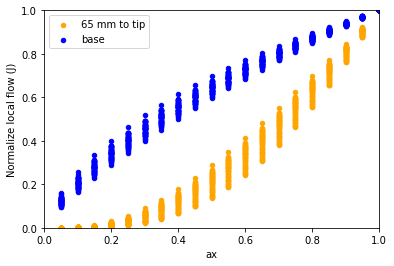

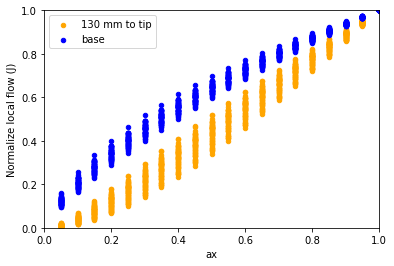

In [28]:
%run simulation_sup-fig-7.py parameters_fig-6D_sup-fig-7.yml